## **21BIO112: Lab Assignment 5**
Name     : Abhinav Pandey

Roll No. : AM.EN.U4AIE21088


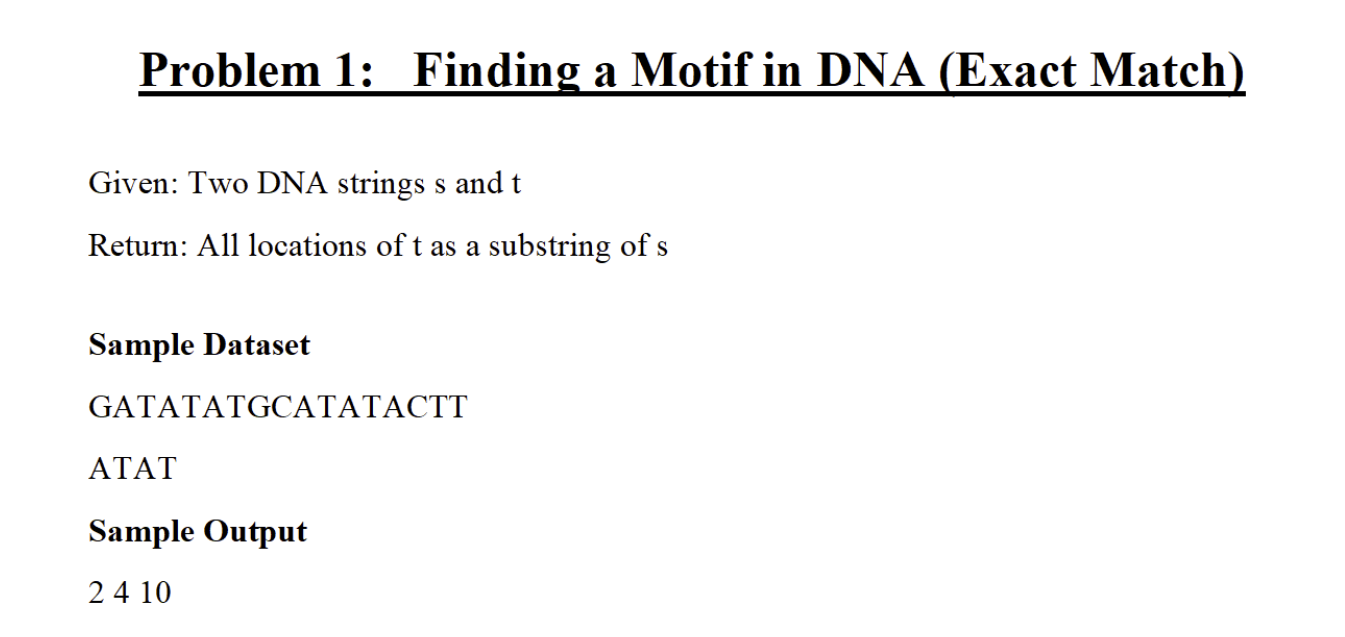

In [ ]:
#problem1
#finding a motif in DNA
s = input("Enter string s").upper()
t = input("Enter string t").upper()

flag = False
output = ""
for i in range(0,len(s)):
  for j in range(0,len(t)):
    if s[i+j]!=t[j]:
      flag=False
      break
    else :
      flag = True
  if flag:
    output = output + str(i+1) +" "

print(str(output))

Enter string sGATATATGCATATACTT
Enter string tatat
2 4 10 


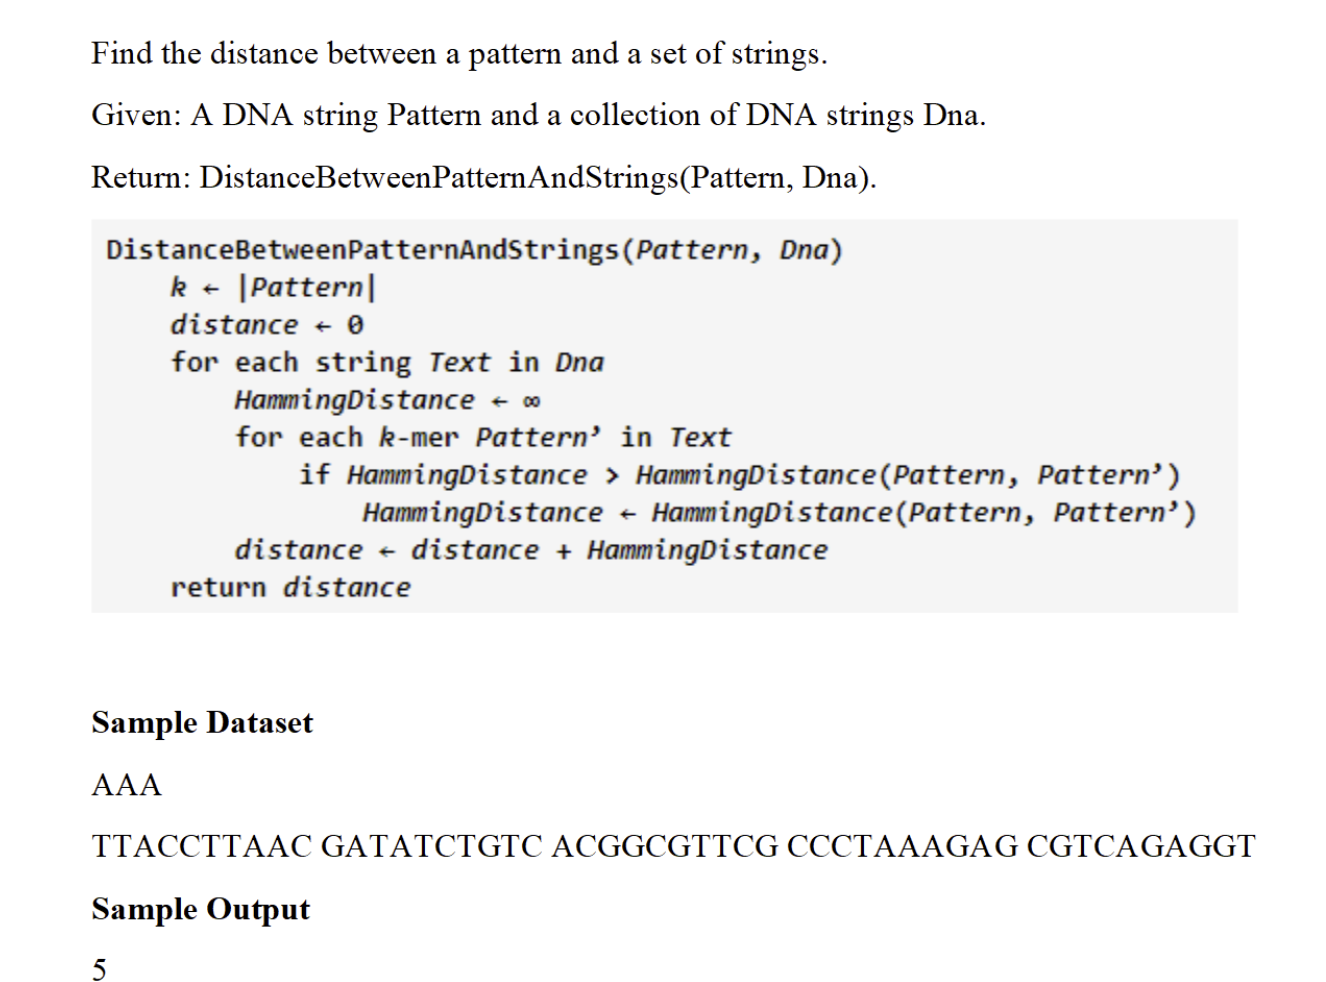

In [ ]:
#question2

#function to calculate hamming distance
def hamming(second, first):
  for i in range(0,  len(first)):
      distance = 0
      if first[i] != second[i]:
        distance += 1
  return distance

#input
DNA = ['TTACCTTAAC', 'GATATCTGTC', 'ACGGCGTTCG', 'CCCTAAAGAG',
'CGTCAGAGGT']
k = input("Enter pattern ")
length = len(k)

#find the distance between pattern and strings
distance = 0
for dna in DNA:
  greatest_hamming_distance = 0
  for i in range(len(dna) - length + 1):
    motif = dna[i:i + length] 
    if hamming(k, motif) > greatest_hamming_distance:
      greatest_hamming_distance = hamming(k, motif) 
  distance += greatest_hamming_distance
print(distance)


Enter pattern aaa
5


In [ ]:
#question3
#brute force motif search

def Neighbors(pattern, d):
  if d == 0:
    return pattern
  elif len(pattern) == 1:
    return ['A', 'C', 'G', 'T']
  code = ['A', 'C', 'G', 'T']
  neighborhood = []
  suffix_neighbour = Neighbors(pattern[1:], d)
  for suffix in suffix_neighbour:
    if hamming(pattern[1:], suffix) < d:
      for base in code:
        neighborhood.append(base + suffix)
    else:
      neighborhood.append(pattern[0] + suffix)
  return neighborhood

def BruteMotifEnumeration(dna, k, d):
 patterns = []
 biglist = []
 for x in range(len(dna)):
  for i in range(len(dna[x]) - k + 1):
    kmer = dna[x][i:i + k]
    neighbors = Neighbors(kmer, d)
    patterns.extend(neighbors)
  biglist.append(set(patterns))
  patterns = []

 common_patterns = biglist[0]
 for j in range(1, len(dna)):
  common_patterns.intersection_update(biglist[j])
 return list(common_patterns)

dtxt_in = """AAGTTAAAGCTCGTCCTGCCACCGC
ATAAGTGGCACGACGGGGTGTAAGC
TGGGGTGCGGTAAGCTGCGAAGGGA
TCCCGCAAGTAGGTCAAAGCATCCA
ACGCAGGTGGATCATAGAGTAAAGC
TAAGCATCAATGTTACGTAAATGGA"""
dna_in= [y for y in (x.strip() for x in dtxt_in.splitlines()) if y]
k_in = 5
d_in = 1
Corr_out = "AAGTG GAAGC GTAAA TAAGC GTGAA CAAGC GGTAA AAAGC AGTAA"

print(" ".join(BruteMotifEnumeration(dna_in, k_in, d_in)))

GCCTC TTCGC CGAAA ACTCC ATACG ACGGA TCGCG GAAGG CAGTA TAGGC TCTAG GGGGA CCTGA ACAGA ATTAC ACGCG TAGGT GCCAT GCTCC GTCGA TGATT GAGGG TCCAC ATAAG GCTCT ATCCT TTTTC CGTTG CCCTC ACCTT CGAAT GGTAT TATCT TTGTT CGGAC GTTCG CTGGA AAGAG TCCGC AGTAA CTAGA CATCT GAGTC CACCC TCTAA CATTT TGGAG GTACA TGAGA CATAC TATGA TCGGC GTCCA CTCTA GAACA GCCCA CCACT GTAAC TCACG AGACG GTTGT CTGCT TGCCG TACCA CCCGG CGGCG CTACC ATGGC CGACG AAGCT TGTAT GATGT CTACT GCGGG GTGGC ACGAA CGTAA AGAAC CTTGC CCATC GTATC GATGA ATGTT GGATT CACTG GAAGA CCCAA GTCAG CTTAA TTCCA CGCAC CGCCT CACGT TAGTA GGACT GATCA CTATA TAATT GCATC AGTGA ACGTA TAACT TAAGG GCGCT GGCGC ACCGT CTCGT CCGGG AAGAC GATCC GCAGT GAGAG GGATG TTACA GTCCT CGGGA GTGTG CCAGC AGGTA GCGAG TCCAT TCTGG ATTCG AGCCT GACTA AAGCA CGGGG TTTAG AATGT TACTG GGAGG TGTCG ACCGC AGGAT TTTAA CATGG ATCGG TAAAA GACTG ATACA GAATG CGAAC TGTAC CACGC AGGAA CTCCT CTGAC GATAC GCATT ATCAG CGGCC AGAAG TTTGG TAGGA TTGCA CTGAA CTACA TGGGG ATCTG ACGAT ATATA TGGAC ATCTA TGGTA GTTTT CAGTT TAAT

In [ ]:
#question4
#scoring motifs
from random import randrange 

#main function
def scoreMotifs(m): 
  z = zip(*m)     
  total = 0     
  for string in z: 
    score = len(string) - max([string.count('A'), 
                               string.count('C'), 
                               string.count('G'), 
                               string.count('T')])         
    total += score     
  return total 

#generate a random dna matrix
def random_seq(): 
  dna_mapping = ['T', 'A', 'C', 'G'] 
  return ''.join([dna_mapping[randrange(4)] for _ in range(3)]) 

#count matrix 
motifs = [random_seq() for _ in range(1000000)] 
print(scoreMotifs(motifs)) 

#profile matrix
motifs = ['GCG', 'AAG', 'AAG', 'ACG', 'CAA'] 
print(scoreMotifs(motifs)) 


2247892
5
